Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


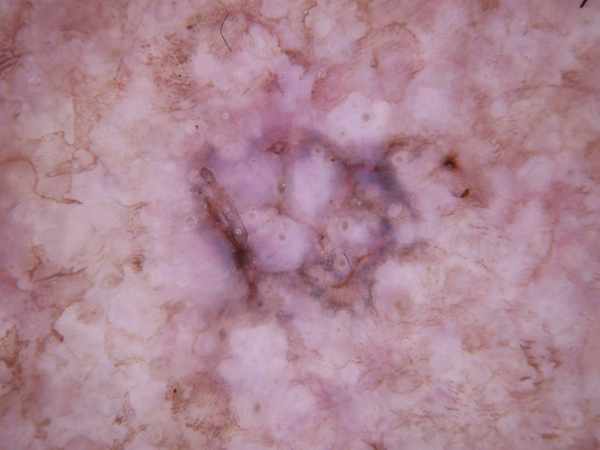

In [ ]:
xyz = list(data_dir_train.glob('actinic keratosis/*'))
PIL.Image.open(str(xyz[0]))

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

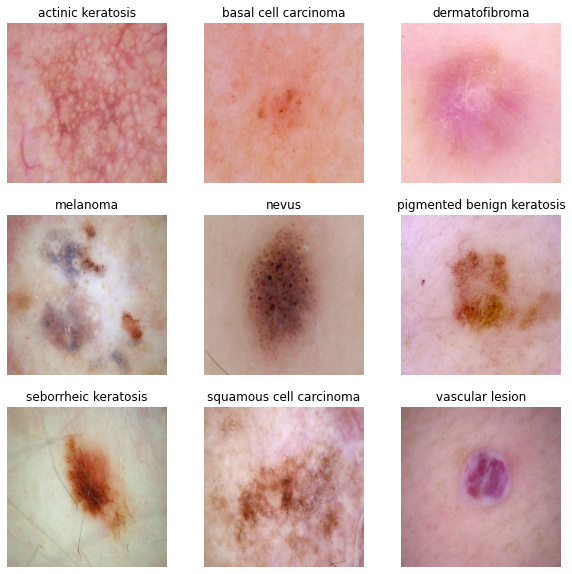

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
count = 0
for class_name in  class_names:
  for images, labels in train_ds:
    for i in range(32):
      count0 = count
      if class_name == class_names[labels[i]]:
        ax = plt.subplot(3, 3, count+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        count +=1
        break
    if count0 != count:
      break

In [ ]:
for images, labels in train_ds.take(1):
  for i in range(32):
    #print('images = ', images[i])
    print('label = ', class_names[labels[i]])
    #print(type(images))

label =  actinic keratosis
label =  pigmented benign keratosis
label =  pigmented benign keratosis
label =  nevus
label =  melanoma
label =  basal cell carcinoma
label =  pigmented benign keratosis
label =  pigmented benign keratosis
label =  melanoma
label =  squamous cell carcinoma
label =  basal cell carcinoma
label =  nevus
label =  melanoma
label =  nevus
label =  melanoma
label =  pigmented benign keratosis
label =  melanoma
label =  basal cell carcinoma
label =  melanoma
label =  pigmented benign keratosis
label =  basal cell carcinoma
label =  nevus
label =  melanoma
label =  pigmented benign keratosis
label =  dermatofibroma
label =  vascular lesion
label =  seborrheic keratosis
label =  pigmented benign keratosis
label =  nevus
label =  basal cell carcinoma
label =  squamous cell carcinoma
label =  nevus


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
for image_batch, labels_batch in train_ds.take(1):
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0062742946 0.7693528


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
  # View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 28ms/step - loss: 2.0261 - accuracy: 0.2405 - val_loss: 1.9455 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 1s 24ms/step - loss: 1.8935 - accuracy: 0.3075 - val_loss: 1.8833 - val_accuracy: 0.2931
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7639 - accuracy: 0.3544 - val_loss: 1.7379 - val_accuracy: 0.3781
Epoch 4/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5027 - accuracy: 0.4833 - val_loss: 1.4496 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.3332 - accuracy: 0.5396 - val_loss: 1.4241 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.2170 - accuracy: 0.5720 - val_loss: 1.4673 - val_accuracy: 0.5078
Epoch 7/20
56/56 [==============================] - 1s 25ms/step - loss: 1.2129 - accuracy: 0.5586 - val_loss: 1.4306 - val_accuracy: 0.5280
Epoch 8/20
56

In [ ]:
num_classes = len(class_names)

model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
  # View the summary of all layers
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 45, 45, 128)     

### Train the model

In [ ]:
epochs = 20
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 4s 49ms/step - loss: 2.0513 - accuracy: 0.2634 - val_loss: 1.8676 - val_accuracy: 0.3333
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6649 - accuracy: 0.3951 - val_loss: 1.5023 - val_accuracy: 0.5190
Epoch 3/20
56/56 [==============================] - 2s 43ms/step - loss: 1.4857 - accuracy: 0.4933 - val_loss: 1.5105 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 2s 43ms/step - loss: 1.3246 - accuracy: 0.5296 - val_loss: 1.3715 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 2s 43ms/step - loss: 1.2200 - accuracy: 0.5731 - val_loss: 1.3969 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.1591 - accuracy: 0.5887 - val_loss: 1.3449 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 2s 43ms/step - loss: 1.0755 - accuracy: 0.6183 - val_loss: 1.3686 - val_accuracy: 0.5570
Epoch 8/20
56

### Visualizing training results

In [ ]:
num_classes = len(class_names)

model3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
num_classes = len(class_names)

model4 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
  # View the summary of all layers
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 45, 45, 64)      

In [ ]:
  # View the summary of all layers
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 45, 45, 64)      

### Train the model

In [ ]:
epochs = 20
history3 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 31ms/step - loss: 2.0105 - accuracy: 0.2327 - val_loss: 1.9281 - val_accuracy: 0.2617
Epoch 2/20
56/56 [==============================] - 2s 28ms/step - loss: 1.8986 - accuracy: 0.2824 - val_loss: 1.7834 - val_accuracy: 0.3356
Epoch 3/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6592 - accuracy: 0.3867 - val_loss: 1.6634 - val_accuracy: 0.3848
Epoch 4/20
56/56 [==============================] - 2s 28ms/step - loss: 1.6035 - accuracy: 0.4213 - val_loss: 1.6201 - val_accuracy: 0.3781
Epoch 5/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5542 - accuracy: 0.4319 - val_loss: 1.5878 - val_accuracy: 0.4094
Epoch 6/20
56/56 [==============================] - 2s 28ms/step - loss: 1.5385 - accuracy: 0.4531 - val_loss: 1.5290 - val_accuracy: 0.4564
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.4538 - accuracy: 0.4782 - val_loss: 1.4309 - val_accuracy: 0.4877
Epoch 8/20
56

In [ ]:
epochs = 20
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 2s 32ms/step - loss: 2.0731 - accuracy: 0.1791 - val_loss: 2.0455 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 29ms/step - loss: 1.9675 - accuracy: 0.2372 - val_loss: 1.8624 - val_accuracy: 0.3177
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.7805 - accuracy: 0.3404 - val_loss: 1.6945 - val_accuracy: 0.4206
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.6355 - accuracy: 0.4029 - val_loss: 1.5576 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5046 - accuracy: 0.4615 - val_loss: 1.4815 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 2s 29ms/step - loss: 1.4434 - accuracy: 0.4955 - val_loss: 1.4654 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 2s 28ms/step - loss: 1.3626 - accuracy: 0.5050 - val_loss: 1.4729 - val_accuracy: 0.4743
Epoch 8/20
56

In [ ]:
num_classes = len(class_names)

model5 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

### Todo, choose an appropirate optimiser and loss function
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model5.summary())
epochs = 30
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_55 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [ ]:
num_classes = len(class_names)

model6 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])
model = model6

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model.summary())
epochs = 20
history6 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_16 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_65 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [ ]:
num_classes = len(class_names)

model7 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])
model = model7

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model.summary())
epochs = 20
history7 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_22 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_103 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 dropout_85 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_104 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [ ]:
num_classes = len(class_names)

model8 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])
model = model8

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model.summary())
epochs = 20
history8 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_28 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_133 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_121 (MaxPooli  (None, 90, 90, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_134 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_122 (MaxPooli  (None, 45, 45, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 45, 45, 64)      

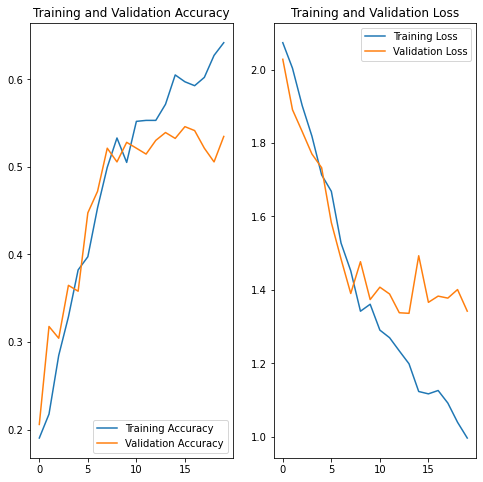

In [ ]:
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

The model was overfitting at first, but after adding dropout layers the overfitting was handled. But the accuracy is not acceptable.


Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F096C920710>: 100%|██████████| 500/500 [00:17<00:00, 28.01 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F096C911150>: 100%|██████████| 500/500 [00:17<00:00, 28.11 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0ADC072D50>: 100%|██████████| 500/500 [00:20<00:00, 24.29 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x645 at 0x7F096C8C0B90>: 100%|██████████| 500/500 [01:29<00:00,  5.60 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F096C2C6FD0>: 100%|██████████| 500/500 [01:25<00:00,  5.88 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F096C90AE10>: 100%|██████████| 500/500 [00:17<00:00, 28.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F096F4B7ED0>: 100%|██████████| 500/500 [00:43<00:00, 11.54 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F096C2D7D10>: 100%|██████████| 500/500 [00:18<00:00, 27.72 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0B5B19C090>: 100%|██████████| 500/500 [00:46<00:00, 10.75 Samples/s] 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026171.jpg_236a6e55-20e0-4833-847d-b7489466f888.jpg',
 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028063.jpg_2bd303d4-93db-48cb-8966-7d75ae36eb23.jpg',
 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025992.jpg_ecf6e788-3a17-4fb5-9e1c-c9fc8574e3a3.jpg',
 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029500.jpg_f2a4a9cf-3347-4d13-b339-9a2301de5981.jpg',
 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])



#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_29 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_138 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_126 (MaxPooli  (None, 90, 90, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_139 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_127 (MaxPooli  (None, 45, 45, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_140 (Conv2D)         (None, 45, 45, 64)      

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 34s 190ms/step - loss: 1.8856 - accuracy: 0.2689 - val_loss: 1.6564 - val_accuracy: 0.3935
Epoch 2/30
169/169 [==============================] - 34s 195ms/step - loss: 1.5734 - accuracy: 0.3950 - val_loss: 1.4971 - val_accuracy: 0.4180
Epoch 3/30
169/169 [==============================] - 33s 190ms/step - loss: 1.4390 - accuracy: 0.4379 - val_loss: 1.4702 - val_accuracy: 0.4336
Epoch 4/30
169/169 [==============================] - 32s 183ms/step - loss: 1.4374 - accuracy: 0.4488 - val_loss: 1.3956 - val_accuracy: 0.4581
Epoch 5/30
169/169 [==============================] - 32s 183ms/step - loss: 1.3088 - accuracy: 0.4967 - val_loss: 1.2716 - val_accuracy: 0.5241
Epoch 6/30
169/169 [==============================] - 32s 184ms/step - loss: 1.2474 - accuracy: 0.5191 - val_loss: 1.3059 - val_accuracy: 0.4967
Epoch 7/30
169/169 [==============================] - 33s 191ms/step - loss: 1.1895 - accuracy: 0.5406 - val_loss: 1.1799 - val_ac

#### **Todo:**  Visualize the model results

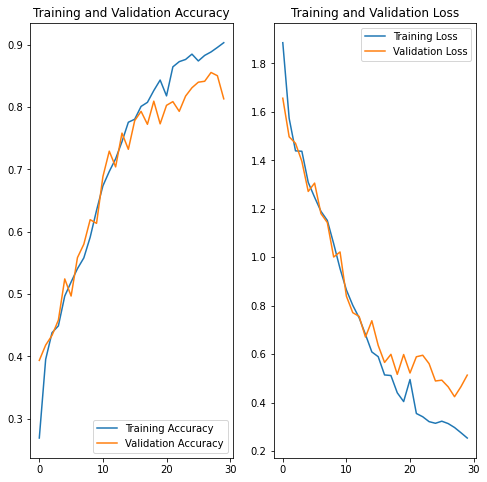

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('gdrive/My Drive/ML&AI/TrainedModels/Cancer_detection/model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_MODEL_FILE_PATH = 'gdrive/My Drive/ML&AI/TrainedModels/Cancer_detection/model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_29_input'],
  'outputs': ['dense_57']}}

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

assert np.allclose(predictions, predictions_lite)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

In [ ]:
#image_path = 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/nevus/ISIC_0000000.jpg'
image_path = 'gdrive/My Drive/ML&AI/CNN_Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test/dermatofibroma/ISIC_0024396.jpg'
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
print('Prediction = ',predictions[0])
score = tf.nn.softmax(predictions[0])
print('Scores = ',score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 32ms/step
Prediction =  [  1.798431    3.4561267   3.932595   -8.216587   -4.0748744  -3.7928483
 -13.750668   -1.8621796  -5.647915 ]
Scores =  tf.Tensor(
[6.7888334e-02 3.5622403e-01 5.7365501e-01 3.0361830e-06 1.9100780e-04
 2.5324064e-04 1.1992444e-08 1.7458712e-03 3.9617593e-05], shape=(9,), dtype=float32)
This image most likely belongs to dermatofibroma with a 57.37 percent confidence.
